# Dog Categorizer

In this project we are going to build a simple dog categorizer. We are looking at three types of different dog breeds (husky, german shepard and australian shepard) and see if we can build a simple model to identify them. 

## Preparing our project

We are going to install all the necessary dependacy and data for this proejct. Then we are going to have a look at our data. 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# Importing the necessary fastai packages
from fastai import *
from fastai.vision import *

# Check PyTorch version as causes errors in colab
print(torch.__version__)

1.4.0


In [0]:
# If PyTorch is 1.4 and above there are a few errors so backdata the package
# !pip install "torch==1.4" "torchvision==0.5.0"


In [0]:
# setting a batch size for our project 
bs = 32

### Looking at our data

In [0]:
!ls


drive  sample_data


In [0]:
path = Path('drive/My Drive/dog-categorizer')
path.ls()

[PosixPath('drive/My Drive/dog-categorizer/urls_australian_shepard.csv'),
 PosixPath('drive/My Drive/dog-categorizer/urls_german_shepard.csv'),
 PosixPath('drive/My Drive/dog-categorizer/urls_husky.csv'),
 PosixPath('drive/My Drive/dog-categorizer/husky'),
 PosixPath('drive/My Drive/dog-categorizer/german_shepard'),
 PosixPath('drive/My Drive/dog-categorizer/australian_shepard'),
 PosixPath('drive/My Drive/dog-categorizer/models')]

We need to download our images


In [0]:
classes = ['husky','german_shepard','australian_shepard']

In [0]:
for item in classes:
  print("item: ", item)
  path = Path('drive/My Drive/dog-categorizer/')
  print('path: ', path)
  folder = item
  print('folder: ', folder)
  file = 'urls_{}.csv'.format(item)
  print("file: ", file)
  dest = path/folder
  print('dest: ', dest)
  download_images(path/file, dest, max_pics=200)
  print("-------------------------")

item:  husky
path:  drive/My Drive/dog-categorizer
folder:  husky
file:  urls_husky.csv
dest:  drive/My Drive/dog-categorizer/husky


-------------------------
item:  german_shepard
path:  drive/My Drive/dog-categorizer
folder:  german_shepard
file:  urls_german_shepard.csv
dest:  drive/My Drive/dog-categorizer/german_shepard


-------------------------
item:  australian_shepard
path:  drive/My Drive/dog-categorizer
folder:  australian_shepard
file:  urls_australian_shepard.csv
dest:  drive/My Drive/dog-categorizer/australian_shepard


-------------------------


In [0]:
# verify and remove any files which can't be opened
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

husky


german_shepard


australian_shepard


## Viewing Data

Now that we have downloaded all the images from google images, let's have a look at some of the data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes

['australian_shepard', 'german_shepard', 'husky']

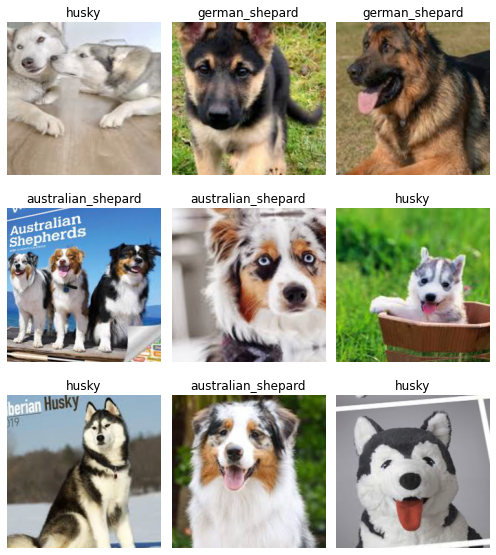

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
# let's have a look at the shape and split of our data
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['australian_shepard', 'german_shepard', 'husky'], 3, 192, 48)

## Training our model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.037256,0.276099,0.062500,00:04
1,1.167836,0.186573,0.020833,00:03
2,0.790347,0.202990,0.020833,00:03
3,0.590276,0.201666,0.020833,00:03


In [0]:
learn.save('stage-1')


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


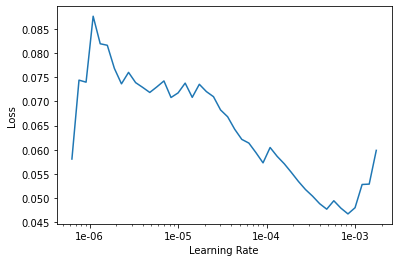

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.072490,0.168654,0.041667,00:03
1,0.061879,0.165083,0.041667,00:03


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

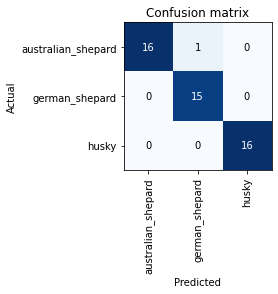

In [0]:
interp.plot_confusion_matrix()

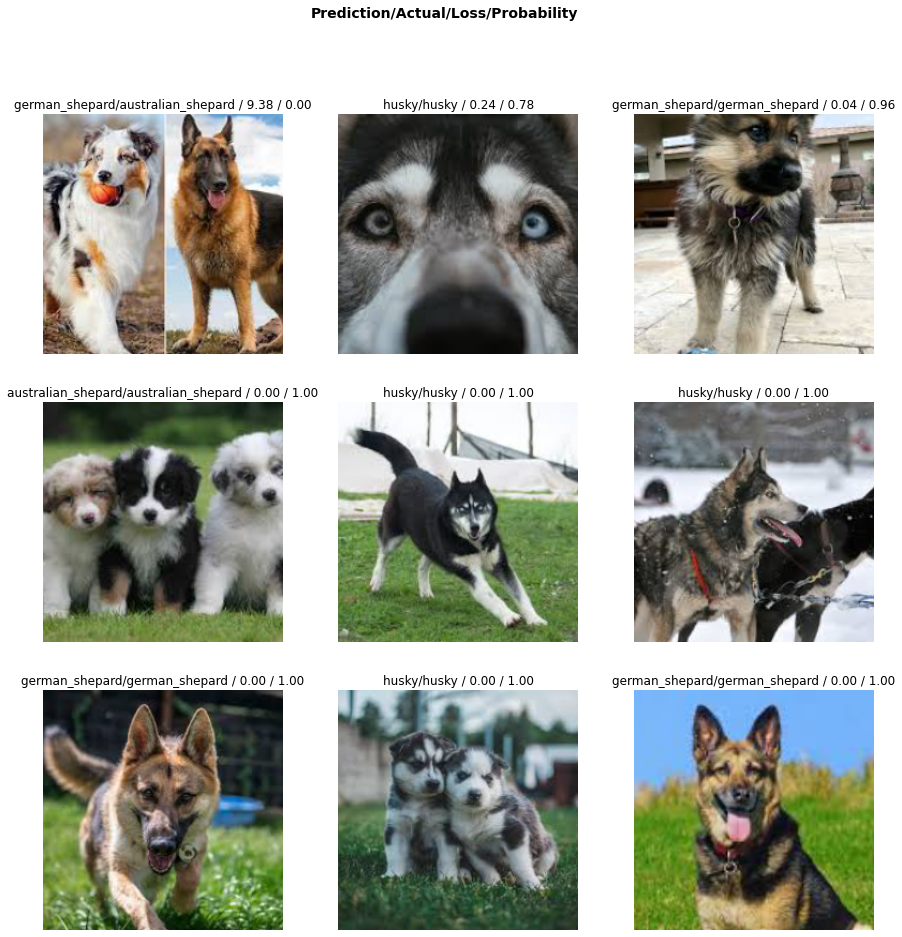

In [0]:
# Let's have a look at the images of the top losses 
interp.plot_top_losses(9, figsize=(15,15))

As you can see here, the only image that was wrong was a mix of both german shepard and australian shepard. If we remove this image as this shouldn't be in there - this will greatly improve the model - maybe make it 100%.